<a href="https://colab.research.google.com/github/crea0414/1st_CVDL/blob/master/Day005_draw_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  範例

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2, os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/drive/My Drive/First_CV_DL191125/lena.png'
img = cv2.imread(img_path)

## Hint: 矩形

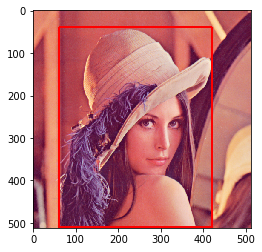

In [0]:
img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (0, 0, 255), 3)

img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)
plt.imshow(img_rect);

## Hint: 線

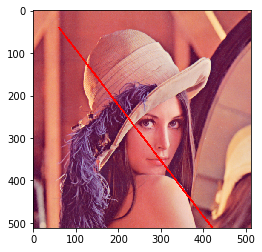

In [0]:
img_line = img.copy()
cv2.line(img_line, (60, 40), (420, 510), (0, 0, 255), 3)

img_line = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)
plt.imshow(img_line);

## Hint: 文字

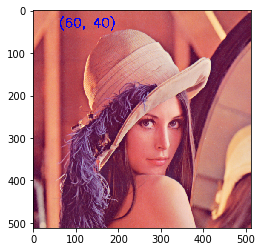

In [0]:
img_text = img.copy()
cv2.putText(img_text, '(60, 40)', (60, 40), 0, 1, (255, 0, 0), 2)

img_text = cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)
plt.imshow(img_text);

#  作業

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框

##  解法一

根據題目，參考之前的投影片，最簡單的方式是

1. 顏色的操作 (對明亮度做直方圖均衡)
2. 把矩形邊框畫在圖片上之後在做位置上的變換

得到的圖的結果正確，但你不知道新的矩型邊框座標點

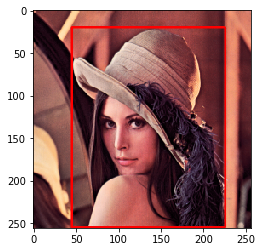

In [0]:
img_hw = img.copy()
point1 = (60, 40)
point2 = (420, 510)

"""
對明亮度做直方圖均衡
"""
# 原始 BGR 圖片轉 HSV 圖片
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡
img_hw[..., -1] = cv2.equalizeHist(img_hw[..., -1])

# 將圖片轉回 BGR
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2BGR)

"""
畫出人物矩形邊框
"""
cv2.rectangle(img_hw, point1, point2, (0, 0, 255), 3)

"""
水平鏡像 + 縮放處理 (0.5 倍)
"""
# 水平鏡像 (圖片)
img_hw = img_hw[:, ::-1, :]

# 縮放處理
img_hw = cv2.resize(img_hw, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB)
plt.imshow(img_hw);

##  解法二

如果希望得知矩型邊框的位置

1. 顏色的操作 (對明亮度做直方圖均衡)
2. 鏡像可以透過四則運算得知
3. 透過建構 transformation matrix 做縮放
4. 把矩型邊框的點與 transformation matrix 相乘就會得到縮放後的位置
5. 畫圖

得到的圖的結果正確，同時也知道新的矩型邊框座標點

M_scale.shape=(2, 3), bbox.shape=(2, 2)
[[226  20]
 [ 46 255]
 [  0   0]]
origin point1=[452, 40], origin point2=[92, 510]
resize point1=(226, 20), resize point2=(46, 255)


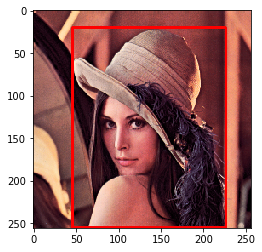

In [0]:
img_hw = img.copy()
point1 = [60, 40]
point2 = [420, 510]

"""
對明亮度做直方圖均衡
"""
# 原始 BGR 圖片轉 HSV 圖片
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡
img_hw[:,:,-1] = cv2.equalizeHist(img_hw[:,:,-1])
# 將圖片轉回 BGR
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2BGR)
"""
水平鏡像
"""
h, w = img_hw.shape[:2]

# 圖片鏡像
img_hw = img_hw[:, ::-1, :]

# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1[0] = w - point1[0]
point2[0] = w - point2[0]

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)

# 建構 scale matrix
M_scale = np.array([[fx, 0, 0], 
                    [0, fy, 0]], dtype=np.float32)
img_hw = cv2.warpAffine(img_hw, M_scale, (resize_row, resize_col))

# 把左上跟右下轉為矩陣型式
bbox = np.array((point1, point2), dtype=np.float32)
print('M_scale.shape={}, bbox.shape={}'.format(M_scale.shape, bbox.shape))

# 做矩陣乘法可以使用(inner product) `np.dot`, 為了做矩陣乘法, M_scale 需要做轉置之後才能相乘
homo_coor_result = np.dot(M_scale.T, bbox)
homo_coor_result = homo_coor_result.astype('uint8')
print(homo_coor_result)
scale_point1 = tuple(homo_coor_result[0])
scale_point2 = tuple(homo_coor_result[1])
print('origin point1={}, origin point2={}'.format(point1, point2))
print('resize point1={}, resize point2={}'.format(scale_point1, scale_point2))

# 畫圖
cv2.rectangle(img_hw, scale_point1, scale_point2, (0, 0, 255), 2)

img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB)
plt.imshow(img_hw);

##  解法三 (optional)

把矩型邊框用遮罩的方式呈現，使用同樣處理圖片的方式處理遮罩
最後再找遮罩的左上跟右下的點的位置

這邊會用到許多沒提過的東西，所以當作 optional

new_p1:(45, 20), new_p2:(226, 256)


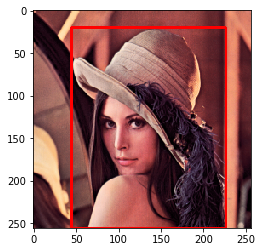

In [0]:
img_hw = img.copy()
#original point
point1 = (60, 40)
point2 = (420, 510)

#create mask
mask = np.zeros_like(img[:,:, -1])
cv2.rectangle(mask, point1, point2, (255, 255, 255), -1)


# equalization 
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)
img_hw[:,:,-1] = cv2.equalizeHist(img_hw[:,:,-1])
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2BGR)

plt.imshow(cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB))


# horizontal flip

img_hw = img_hw[:, ::-1, :]
mask = mask[:,::-1]
plt.imshow(cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB))
plt.imshow(mask, cmap='gray')


#resized
fx = 0.5
fy = 0.5
img_hw = cv2.resize(img_hw, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
mask = cv2.resize(mask, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)


# find contour from mask (top_left and bottom_right)
_, cnts, _ = cv2.findContours(mask, 1, 2)
x, y, w, h = cv2.boundingRect(cnts[0])
new_p1, new_p2 = (x, y), (x+w, y+h)
print(f'new_p1:{new_p1}, new_p2:{new_p2}')

# draw bounding box on img
cv2.rectangle(img_hw, new_p1, new_p2, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB));